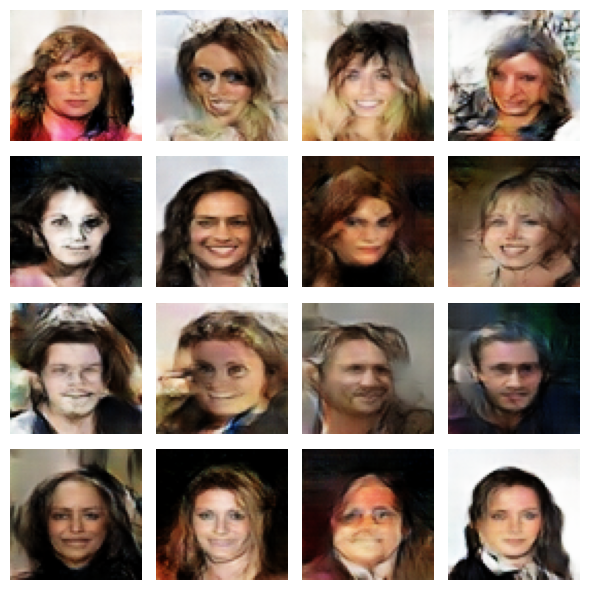

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

LATENT_DIM = 100

# 1) Re-define or import your generator architecture
#    (must match exactly the code you used when saving)
def build_generator():
    model = tf.keras.Sequential(name="Generator")
    model.add(tf.keras.layers.Input(shape=(LATENT_DIM,)))
    model.add(tf.keras.layers.Dense(8*8*256, use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Reshape((8, 8, 256)))
    model.add(tf.keras.layers.Conv2DTranspose(128, 5, strides=2, padding="same", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Conv2DTranspose(64, 5, strides=2, padding="same", use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Conv2DTranspose(3, 5, strides=2, padding="same", use_bias=False, activation="tanh"))
    return model

# 2) Instantiate and load weights
generator = build_generator()
generator.load_weights('Checkpoints/generator_epoch_005.h5')


# 3) Sample from the latent space
NUM_IMAGES = 16
z = tf.random.normal([NUM_IMAGES, LATENT_DIM])

# 4) Generate images (in [–1,1] range)
generated = generator(z, training=False)

# 5) Post-process for display: scale to [0,1]
imgs = (generated + 1.0) * 0.5

# 6) Plot or save
fig, axes = plt.subplots(4, 4, figsize=(6,6))
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i].numpy())
    ax.axis('off')
plt.tight_layout()
plt.show()

